# Data Wrangling - Weather Dataset

Thibault Dody 08/13/2017

The purpose of this notebook is to describe the process used to verify the quality of the weather dataset. The output of this notebook is a new csv file **Weather_Data_Cleaned.csv** located in *./Cleaned Data/* folder.

The data is provided by the National Centers for Environmental Information (NOAA). It is obtained by submitting a request on the agency website. The choice was made to use the data from a single weather station located at the Boston Logan Aiport. This choice is based on the scale of the problem. Indeed, the weather is assumed to be relatively identical over the entire city. If variations exist, they are deemed negligible to impact the frequency of occurrence of potholes.

## 1. Process

The first step consists of a visual inspection of the csv file (loaded using excel). This phase is critical as it is used to define how the data will be imported and how the parameters of the import will be defined. Once the data has been imported and investigated, it needs to be cleaned and re-organized. To do so, missing values are either dropped or estimated and unrelevant features are removed from the set.

The file **Weather_Data_Cleaned.csv** is located in *./Original Data/* folder.

In [1]:
# Import all the python libraries needed for the wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

## 2. Visual inspection

In [2]:
# Import the data as Pandas dataframe and parse the DATE column as DateTime objects.
fileFullPath = "./Original Data/Weather_Data.csv"
weather_raw_df = pd.read_csv(fileFullPath,parse_dates=[2])

Before diving into the content of the dataframe, the size and data type of the dataset are obtained.

In [3]:
# Dataframe Shape
weather_raw_df.shape

(211, 26)

In [4]:
# Dataframe Info
weather_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 26 columns):
STATION    211 non-null object
NAME       211 non-null object
DATE       211 non-null datetime64[ns]
CDSD       211 non-null int64
CLDD       211 non-null int64
DP01       211 non-null int64
DP10       211 non-null int64
DSND       56 non-null float64
DSNW       211 non-null int64
DT00       211 non-null int64
DT32       211 non-null int64
DX32       211 non-null int64
DX70       211 non-null int64
DX90       211 non-null int64
EMNT       211 non-null int64
EMSD       56 non-null float64
EMSN       211 non-null float64
EMXP       211 non-null float64
EMXT       211 non-null int64
HDSD       211 non-null int64
HTDD       211 non-null int64
PRCP       211 non-null float64
SNOW       211 non-null float64
TAVG       211 non-null float64
TMAX       211 non-null float64
TMIN       211 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(14), object(2)
memory usage: 42.9+ KB


The features presented in the file are defined as:

 - *STATION*: (17 characters) is the station identification code.
 - *NAME*: (max 50 characters) is the name of the station (usually city/airport name). This is an optional output field.
 - *DATE*: is the year of the record (4 digits) followed by month (2 digits) and day (2 digits).
 - *CDSD*: Cooling Degree Days (season-to-date). Running total of monthly cooling degree days through the end of the most recent month. Each month is summed to produce a season-to-date total. Season starts in January in Northern Hemisphere and July in Southern Hemisphere. Given in Celsius or Fahrenheit degrees depending on user specification.
 - *CLDD*: Cooling Degree Days. Computed when daily average temperature is more than 65 degrees Fahrenheit/18.3 degrees Celsius. CDD = mean daily temperature - 65 degrees Fahrenheit/18.3 degrees Celsius. Each day is summed to produce a monthly/annual total. Annual totals are computed based on a January – December year in Northern Hemisphere and July – June year in Southern Hemisphere. Given in Celsius or Fahrenheit degrees depending on user specification.
 - *DP01*: Number of days with >= 0.01 inch/0.254 millimeter in the month/year.
 - *DP10*: Number of days with >= 1.00 inch/25.4 millimeters in the month/year
 - *DSND*: Number of days with snow depth >= 1 inch/25 millimeters.
 - *DSNW*: Number of days with snowfall >= 1 inch/25 millimeters.
 - *DT00*: Number of days with maximum temperature <= 0 degrees Fahrenheit/-17.8 degrees Celsius.
 - *DT32*: Number of days with minimum temperature <= 32 degrees Fahrenheit/0 degrees Celsius.
 - *DX32*: Number of days with maximum temperature <= 32 degrees Fahrenheit/0 degrees Celsius.
 - *DX70*: Number of days with maximum temperature >= 70 degrees Fahrenheit/21.1 degrees Celsius.
 - *DX90*: Number of days with maximum temperature >= 90 degrees Fahrenheit/32.2 degrees Celsius.
 - *EMNT*: Extreme minimum temperature for month/year. Lowest daily minimum temperature for the month/year. Given in Celsius or Fahrenheit depending on user specification.
 - *EMSD*: Highest daily snow depth in the month/year. Given in inches or millimeters depending on user specification.
 - *EMSN*: Highest daily snowfall in the month/year. Given in inches or millimeters depending on user specification
 - *EMXP*: Highest daily total of precipitation in the month/year. Given in inches or millimeters depending on user specification.
 - *EMXT*: Extreme maximum temperature for month/year. Highest daily maximum temperature for the month/year. Given in Celsius or Fahrenheit depending on user specification.
 - *HDSD*: Heating Degree Days (season-to-date). Running total of monthly heating degree days through the end of the most recent month. Each month is summed to produce a season-to-date total. Season starts in July in Northern Hemisphere and January in Southern Hemisphere. Given in Celsius or Fahrenheit degrees depending on user specification.
 - *HTDD*: Heating Degree Days. Computed when daily average temperature is less than 65 degrees Fahrenheit/18.3 degrees Celsius. HDD = 65(F)/18.3(C) – mean daily temperature. Each day is summed to produce a monthly/annual total. A
 - *PRCP*: Total Monthly/Annual Precipitation. Given in inches or millimeters depending on user specification.
 - *SNOW*: Total Monthly/Annual Snowfall. Given in inches or millimeters depending on user specification
 - *TAVG*: Average Monthly/Annual Temperature. Computed by adding the unrounded monthly/annual maximum and minimum temperatures and dividing by 2.
 - *TMAX*: Monthly/Annual Maximum Temperature. Average of daily maximum temperature given in Celsius or Fahrenheit depending on user specification
 - *TMIN*: Monthly/Annual Minimum Temperature. Average of daily minimum temperature given in Celsius or Fahrenheit depending on user specification

## 3. Feature cleaning

The following choices are applied:
- Delete *STATION* and *NAME* since they do not contain any data.
- Import *DATE* and *CLOSED_DT* as DateTime objects

In [5]:
# Defined the feature names to be deleted.
columnNameToDelete = ['STATION','NAME']

# Clone the dataset and delete features of the clone.
weather_df = weather_raw_df.copy()
weather_df.drop(columnNameToDelete,inplace=True,axis=1)

weather_df.shape

(211, 24)

Based on the info listed above, it appears that the features *DSDN* and *EMSD* only contain 56 records. We investigate if the data is missing or if missing values are expected.

As a reminder, here are the two features we are interested in:
 - DSND: Number of days with snow depth >= 1 inch/25 millimeters
 - EMSD: Highest daily snow depth in the month/year. Given in inches or millimeters depending on user specification.

In [6]:
weather_df[["DSND","EMSD"]].head()

,DSND,EMSD
0,11.0,5.0
1,14.0,8.0
2,1.0,2.0
3,0.0,0.0
4,0.0,0.0


In [7]:
weather_df[["DSND","EMSD"]].tail()

,DSND,EMSD
206,NaN,NaN
207,NaN,NaN
208,NaN,NaN
209,NaN,NaN
210,NaN,NaN


In [8]:
# Status of the DSND feature
print("The earliest non-null value for DSND is: ",
      min(weather_df[weather_df.DSND.notnull()]["DATE"]))
print("The latest non-null value for DSND is: ",
      max(weather_df[weather_df.DSND.notnull()]["DATE"]))
print("The earliest null value for DSND is: ",
      min(weather_df[weather_df.DSND.isnull()]["DATE"]))
print("The latest null value for DSND is: ",
      max(weather_df[weather_df.DSND.isnull()]["DATE"]))

The earliest non-null value for DSND is:  2000-01-01 00:00:00
The latest non-null value for DSND is:  2004-11-01 00:00:00
The earliest null value for DSND is:  2003-04-01 00:00:00
The latest null value for DSND is:  2017-07-01 00:00:00


For the *DSND* feature, the null values range betwen 04/2003 to the end of the data range. Since most of the data is missing, the choice is made to drop the *DSND* feature.

In [9]:
# Status of the EMSD feature
print("The earliest non-null value for EMSD is: ",
      min(weather_df[weather_df.EMSD.notnull()]["DATE"]))
print("The latest non-null value for EMSD is: ",
      max(weather_df[weather_df.EMSD.notnull()]["DATE"]))
print("The earliest null value for EMSD is: ",
      min(weather_df[weather_df.EMSD.isnull()]["DATE"]))
print("The latest null value for EMSD is: ",
      max(weather_df[weather_df.EMSD.isnull()]["DATE"]))

The earliest non-null value for EMSD is:  2000-01-01 00:00:00
The latest non-null value for EMSD is:  2004-11-01 00:00:00
The earliest null value for EMSD is:  2003-04-01 00:00:00
The latest null value for EMSD is:  2017-07-01 00:00:00


The same issue is observerd for the *EMSD* feature. In conclusion, both *DSND* and *EMSD* are dropped.

In [10]:
# Defined the feature names to be deleted.
columnNameToDelete = ['DSND','EMSD']

# Delete features
weather_df.drop(columnNameToDelete,inplace=True,axis=1)
weather_df.shape

(211, 22)

In [11]:
# Dataframe Info
weather_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 26 columns):
STATION    211 non-null object
NAME       211 non-null object
DATE       211 non-null datetime64[ns]
CDSD       211 non-null int64
CLDD       211 non-null int64
DP01       211 non-null int64
DP10       211 non-null int64
DSND       56 non-null float64
DSNW       211 non-null int64
DT00       211 non-null int64
DT32       211 non-null int64
DX32       211 non-null int64
DX70       211 non-null int64
DX90       211 non-null int64
EMNT       211 non-null int64
EMSD       56 non-null float64
EMSN       211 non-null float64
EMXP       211 non-null float64
EMXT       211 non-null int64
HDSD       211 non-null int64
HTDD       211 non-null int64
PRCP       211 non-null float64
SNOW       211 non-null float64
TAVG       211 non-null float64
TMAX       211 non-null float64
TMIN       211 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(14), object(2)
memory usage: 42.9+ KB


## 4. Re-indexing

In order to facilitate the data exploration and manipulation, the index column of the data frame is reset to the *DATE* feature.

In [12]:
# Set index
weather_df.set_index(["DATE"],inplace=True)
weather_df.head()

,CDSD,CLDD,DP01,DP10,DSNW,DT00,DT32,DX32,DX70,DX90,...,EMSN,EMXP,EMXT,HDSD,HTDD,PRCP,SNOW,TAVG,TMAX,TMIN
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0,0,10,6,3,1,25,14,0,0,...,5.6,0.76,64,2957,1163,2.62,13.2,27.5,35.7,19.3
2000-02-01,0,0,12,5,2,0,23,5,0,0,...,6.5,0.98,61,3851,894,2.56,9.3,34.2,41.4,26.9
2000-03-01,0,0,8,6,1,0,7,1,2,0,...,2.0,1.00,72,4524,673,3.60,2.0,43.3,51.1,35.5
2000-04-01,0,0,15,10,0,0,0,0,2,0,...,0.0,1.50,75,5054,530,5.03,0.0,47.3,54.4,40.2
2000-05-01,15,15,14,7,0,0,0,0,9,1,...,0.0,0.71,91,5310,256,2.89,0.0,57.2,65.9,48.5


## 5. Data exploration

Since this dataset was well maintained, the last control procedure applied is to set up the visualization of certain features in order to confirm the quality of the data.

### 5.1. Temperature over time

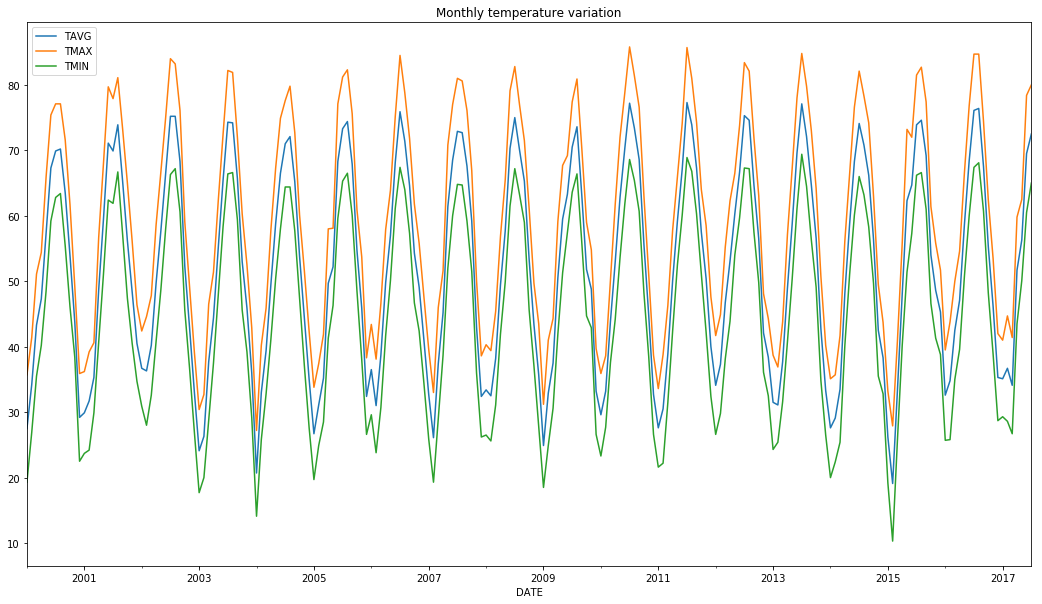

In [14]:
# Average, min, and max temperatures
weather_df[["TAVG","TMAX","TMIN"]].plot(figsize=(18,10),
                                       title="Monthly temperature variation")
plt.savefig('./Figures/Monthly_temp_variation.jpg')

As expected, the average temperature is between the min and max and the range of their values corresponds to the season average in Boston. The season cycle is also visible. The temperature data is acceptable.

### 5.2. Precipitation and snow over time

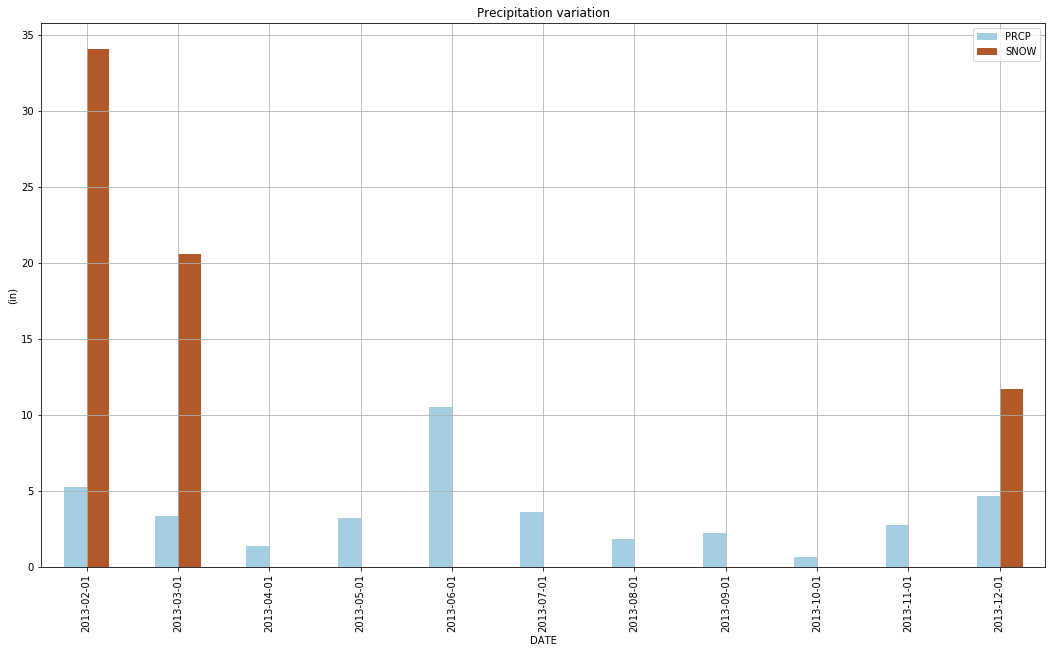

In [15]:
# 2013 Data
weather_2013_df = weather_df[(weather_df.index > "2013-01-01") & (weather_df.index <= "2013-12-01")]
ax = weather_2013_df[["PRCP","SNOW"]].plot(kind='bar',
                                      figsize=(18,10),
                                      title="Precipitation variation",
                                      colormap='Paired');
ax.set_ylabel("(in)")
ax.grid(True)

xtl=[item.get_text()[:10] for item in ax.get_xticklabels()]
ax.set_xticklabels(xtl);
plt.savefig('./Figures/Precipitations.jpg')

## 6. Output cleaned data

The following file will be re-used as part of the potholes analysis.

In [45]:
weather_df.to_csv("./Cleaned Data/Weather_Data_Cleaned.csv")